In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [10]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
df = pd.read_csv('data/Student.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 8)

#### Preparing X & Y variables

In [14]:
X = df.drop(columns=['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

Categories in 'gender' variable:  ['female' 'male']


In [16]:
print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']


In [17]:
print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [18]:
print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

Categories in 'lunch' variable:  ['standard' 'free/reduced']


In [ ]:
print("Categories in 'test preparation' variable: ", end=" ")
print(df['test preparation course'].unique())

In [19]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [22]:
# Create Columns Tranformers with three types of transformer
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [24]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandardScaler", num_transformer, num_feature),
    ]
)

In [25]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X train: {X_train.shape}")

Shape of X train: (800, 19)


In [27]:
print(f"Shape of X-test: {X_test.shape}")

Shape of X-test: (200, 19)


#### Create an Evaluate Function to give all metrics after Model Training

In [28]:
def eval_model(true, predict):
    mae = mean_absolute_error(true, predict)
    mse = mean_squared_error(true, predict)
    rmse = np.sqrt(mean_squared_error(true, predict))
    r2_square = r2_score(true, predict)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Cat-Boosting Regressor": CatBoostRegressor(verbose=False)
}

model_list = []
r2_list = []

In [30]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = eval_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = eval_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
--------------------------------

#### Results

In [31]:
pd.DataFrame(
    list(zip(model_list, r2_list)), 
    columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False
)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,Random Forest Regressor,0.853786
8,Cat-Boosting Regressor,0.851632
4,AdaBoostRegressor,0.850119
3,XGBRegressor,0.827797
1,Lasso,0.825320
6,K-Neighbours Regressor,0.783813
5,Decision Tree,0.743177


#### Linear Regression

In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model: {score:.2f}")

Accuracy of the model: 88.04


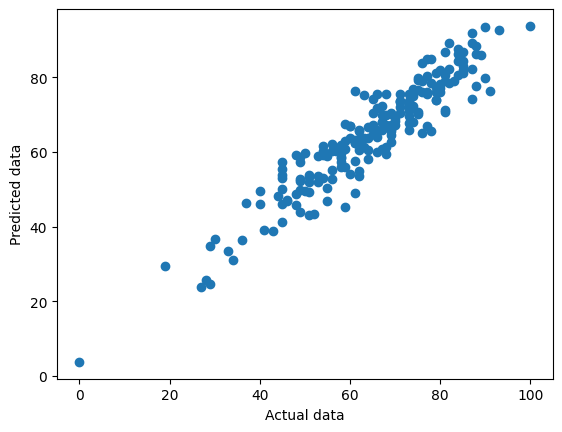

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.show()

<Axes: xlabel='math score'>

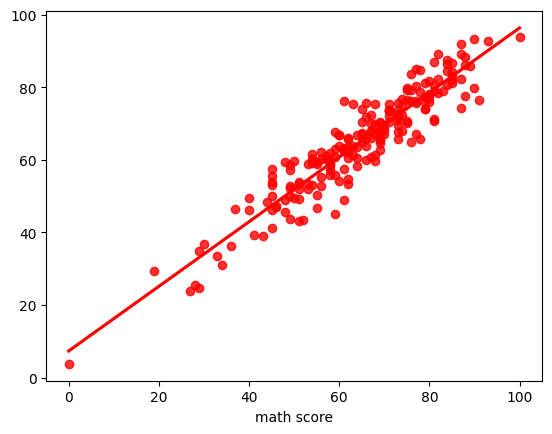

In [34]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

#### Difference between Actual & Predicted values

In [35]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference':y_test - y_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
